In [5]:
from pathlib import Path
import numpy as np
import pandas as pd
from kca import fitKCA
import matplotlib.pyplot as plt

In [6]:
ROOTDIR = Path().cwd()
DATADIR = ROOTDIR / 'data'
filepath = DATADIR / 'data.xlsx'
EURUSD = pd.read_excel(
    filepath.as_uri(),
    sheet_name="EURUSD",
    usecols=[0, 1], 
    skiprows=8,
    parse_dates=[0],
    header=0,
    )

In [7]:
dates = EURUSD['Date']
returns = np.log(EURUSD['PX_LAST']/EURUSD['PX_LAST'].shift(-1)).dropna()

In [8]:
x_mean, x_std, x_covar = fitKCA(t=EURUSD.index, z=returns.values, q=0.1)

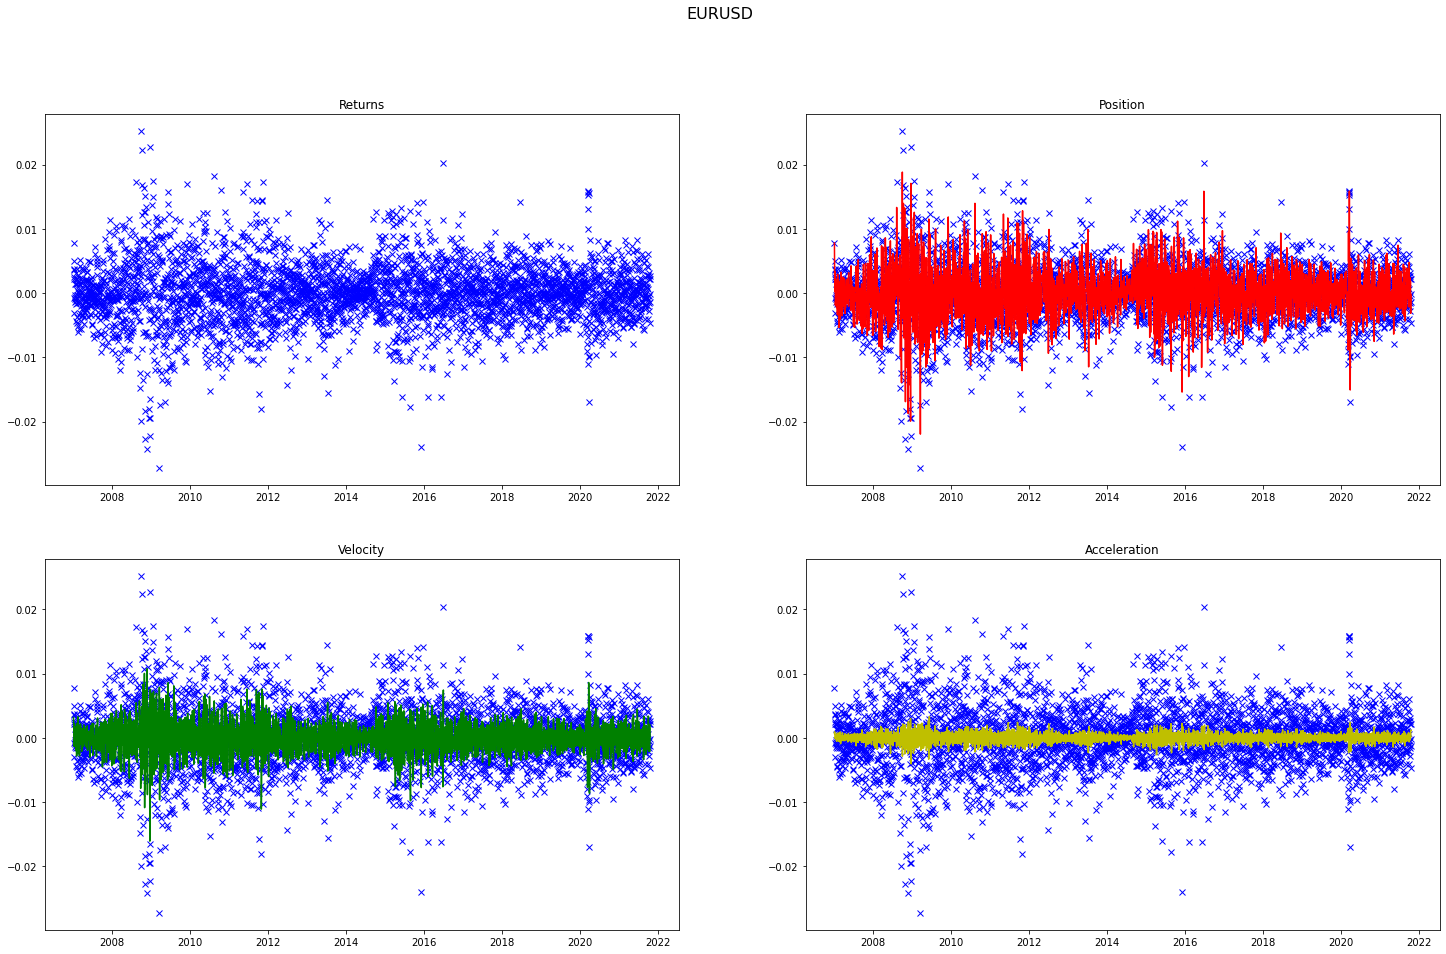

In [9]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(25, 15)

ax1 = axs[0, 0]
ax1.plot(EURUSD['Date'][:-1], returns, marker='x', linestyle='', label='EURUSD', color='b')
ax1.set_title('Returns')

ax2 = axs[0, 1]
ax2.plot(EURUSD['Date'][:-1], returns, marker='x', linestyle='', label='EURUSD', color='b')
ax2.plot(EURUSD['Date'][:-1], x_mean[:, 0], marker='', linestyle='-', label="position", color='r')
ax2.set_title('Position')

ax3 = axs[1, 0]
ax3.plot(EURUSD['Date'][:-1], returns, marker='x', linestyle='', label='EURUSD', color='b')
ax3.plot(EURUSD['Date'][:-1], x_mean[:, 1], marker='', linestyle='-', label='velocity', color='g')
ax3.set_title('Velocity')

ax4 = axs[1, 1]
ax4.plot(EURUSD['Date'][:-1], returns, marker='x', linestyle='', label='EURUSD', color='b')
ax4.plot(EURUSD['Date'][:-1], x_mean[:, 2], marker='', linestyle='-', label='acceleration', color='y')
ax4.set_title('Acceleration')



fig.suptitle('EURUSD', fontsize=16)

plt.style.use('ggplot')
plt.show()

In [10]:
x_mean

array([[-0.00023865, -0.0020721 ,  0.00120196],
       [-0.00181748, -0.00096726,  0.00122103],
       [-0.00315366,  0.00168373,  0.0001754 ],
       ...,
       [ 0.00294709,  0.00208459,  0.00094084],
       [ 0.00503248,  0.00253953,  0.00073713],
       [ 0.00780308,  0.00316842,  0.00068886]])